<a href="https://colab.research.google.com/github/samaneh-m/TU-deep-Learning/blob/main/conv2d_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to 2D Convolutional Layers

In deep learning and computer vision, a **2D convolutional layer** is a fundamental building block of convolutional neural networks (CNNs). It applies a set of learnable filters (also known as **kernels**) to input data such as images, producing a set of **feature maps** that encode spatial hierarchies and local patterns. These kernels learn to detect local image features, like edges or specific colours.

See below. Each image is a learned kernel which gets excited when it sees its pattern!

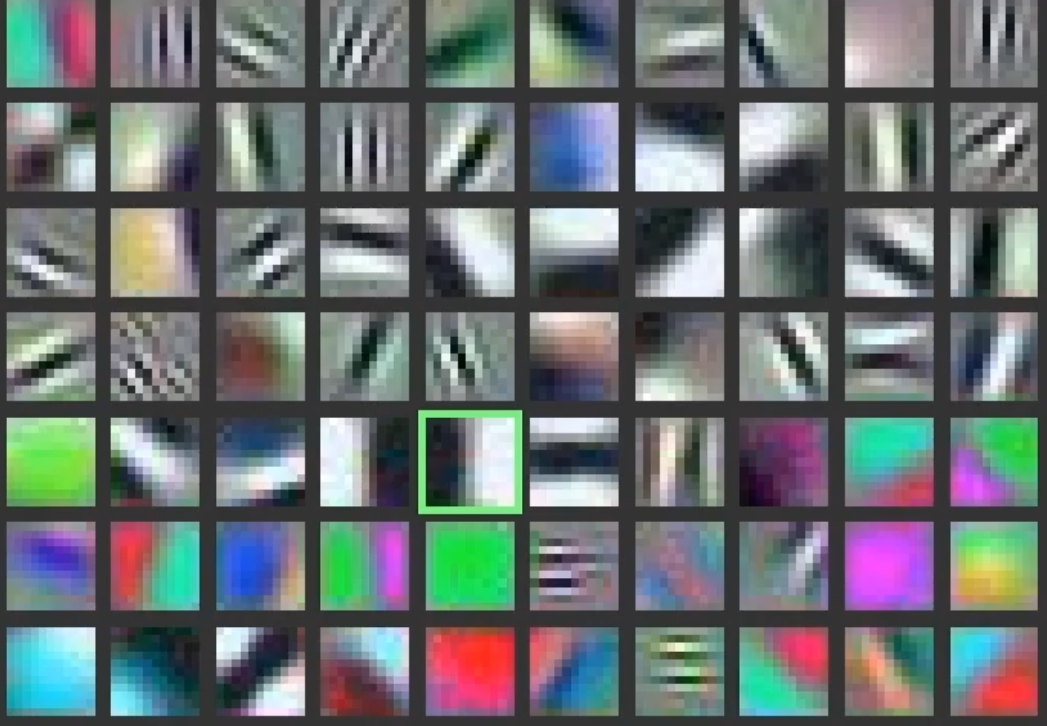

### Input and Output Shapes

Let the input tensor be denoted as:

$
X \in \mathbb{R}^{N \times C_{\text{in}} \times H_{\text{in}} \times W_{\text{in}}}
$

where:

- $N$: batch size
- $C_{\text{in}}$: number of input channels
- $H_{\text{in}}, W_{\text{in}}$: height and width of the input

The convolutional layer applies $C_{\text{out}}$ kernels, with shape:

$
K \in \mathbb{R}^{C_{\text{out}} \times C_{\text{in}} \times K_h \times K_w}
$

where:

- $K_h, K_w$: kernel height and width

The output tensor $Y$ has the shape:

$
Y \in \mathbb{R}^{N \times C_{\text{out}} \times H_{\text{out}} \times W_{\text{out}}}
$

where:

- $H_{\text{out}} = \left\lfloor \frac{H_{\text{in}} + 2p_h - K_h}{s_h} \right\rfloor + 1$
- $W_{\text{out}} = \left\lfloor \frac{W_{\text{in}} + 2p_w - K_w}{s_w} \right\rfloor + 1$
- $p_h, p_w$: padding along height and width
- $s_h, s_w$: stride along height and width

---

### Convolution Operation

Each output value $Y[n, c_{\text{out}}, i, j]$ is computed by applying a kernel over a corresponding spatial patch in the input:

$$
Y[n, c_{\text{out}}, i, j] = \left( \sum_{c_{\text{in}}=0}^{C_{\text{in}}-1} \sum_{u=0}^{K_h - 1} \sum_{v=0}^{K_w - 1}
K[c_{\text{out}}, c_{\text{in}}, u, v] \cdot X_{\text{pad}}[n, c_{\text{in}}, i \cdot s_h + u, j \cdot s_w + v] \right) + \text{b}[c_{\text{out}}]
$$

where $X_{\text{pad}}$ denotes the input tensor after zero-padding and bias vector $b \in \mathbb{R}^{C_{\text{out}}}$

In the image below, you can see such an operation. Here, we look at the computation (without bias) of one value in the feature map of one kernel.

The shown image is **not** padded and the kernel size is $3 \times 3$.

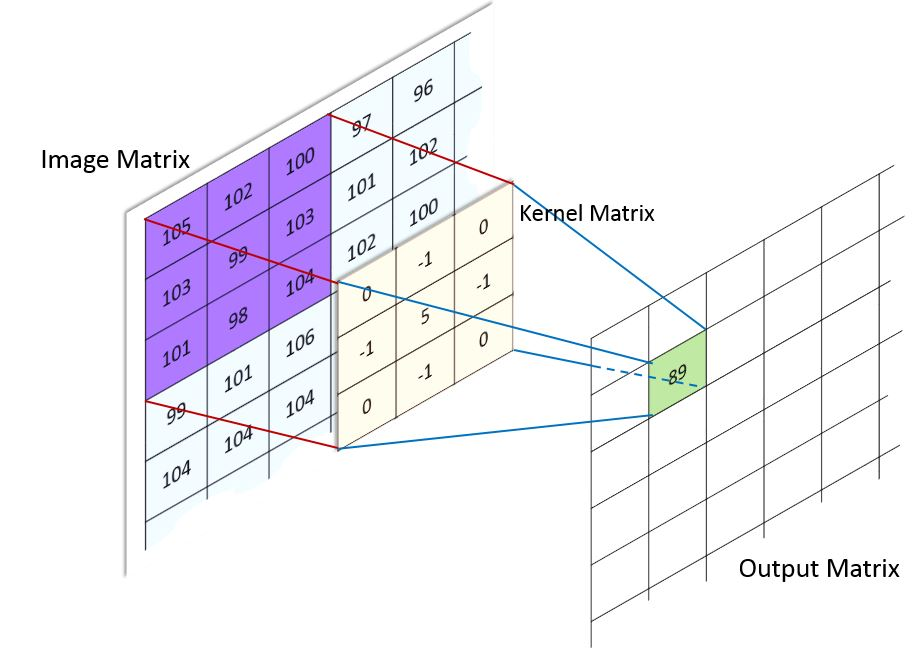

## Imports

In [ ]:
import torch
from torch import nn
from helper import *

## 🛠 Implement the Forward Pass [Easy]


🔹***Task:*** Implement the forward pass of a convolutional layer by using **four nested loops**.

🔍 **Note:** You are only allowed to use these PyTorch functions for your code. This is all you need:
- `torch.zeros`, `torch.sum`, `tensor.shape`

Look into the [documentation](https://pytorch.org/docs/stable/torch.html) for a detailed function explanation. On the website, there is a searchbar at the top left.

In [ ]:
class MyConv2dFunction_4_Loops(torch.autograd.Function):

    @staticmethod
    def forward(ctx, input, weight, bias, stride, padding):
        '''
        Arguments:
            input torch.Tensor -- input tensor of shape (N, C_in, H, W)
            weight torch.Tensor -- weight tensor of shape (C_out, C_in, K_h, K_w)
            bias torch.Tensor -- bias tensor of shape (C_out)
            stride int -- stride of the convolution
            padding int -- padding of the convolution

        Returns:
            output torch.Tensor -- output tensor of shape (N, C_out, H_out, W_out)
        '''
        ################################################
        # Implement the forward pass with four loops
        # TODO

        ################################################

        # Save tensors and parameters for backward pass
        ctx.save_for_backward(input, weight, bias)
        ctx.stride = stride
        ctx.padding = padding
        return output

    @staticmethod
    def backward(ctx, grad_output):
        return None

class MyConv2d_4_Loops(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super().__init__()
        """
        Initializes the custom Conv2d layer.
        """
        self.weight = nn.Parameter(torch.randn(out_channels, in_channels, kernel_size, kernel_size))
        self.bias = nn.Parameter(torch.ones(out_channels))
        self.stride = stride
        self.padding = padding

    def forward(self, x):
        return MyConv2dFunction_4_Loops.apply(x, self.weight, self.bias, self.stride, self.padding)

# test your implementation
test_conv2d_forward(MyConv2d_4_Loops)

## 🛠 Implement the Forward Pass [Medium]

🔹***Task:*** Implement the forward pass of a convolutional layer by using **three nested loops**. Do not use a loop over the channels.

🔍 **Note:** You are only allowed to use these PyTorch functions for your code. This is all you need:
- `torch.zeros`, `torch.sum`, `tensor.unsqueeze`, `tensor.squeeze`, `tensor.shape`

Look into the [documentation](https://pytorch.org/docs/stable/torch.html) for a detailed function explanation. On the website, there is a searchbar at the top left.

In [ ]:
class MyConv2dFunction_3_Loops(torch.autograd.Function):

    @staticmethod
    def forward(ctx, input, weight, bias, stride, padding):
        '''
        Arguments:
            input torch.Tensor -- input tensor of shape (N, C_in, H, W)
            weight torch.Tensor -- weight tensor of shape (C_out, C_in, K_h, K_w)
            bias torch.Tensor -- bias tensor of shape (C_out)
            stride int -- stride of the convolution
            padding int -- padding of the convolution

        Returns:
            output torch.Tensor -- output tensor of shape (N, C_out, H_out, W_out)
        '''
        ################################################
        # Implement the forward pass with three nested loops
        # TODO

        ################################################

        # Save tensors and parameters for backward pass
        ctx.save_for_backward(input, weight, bias)
        ctx.stride = stride
        ctx.padding = padding
        return output

    @staticmethod
    def backward(ctx, grad_output):
        return None

class MyConv2d_3_Loops(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super().__init__()
        """
        Initializes the custom Conv2d layer.
        """
        self.weight = nn.Parameter(torch.randn(out_channels, in_channels, kernel_size, kernel_size))
        self.bias = nn.Parameter(torch.ones(out_channels))
        self.stride = stride
        self.padding = padding

    def forward(self, x):
        return MyConv2dFunction_3_Loops.apply(x, self.weight, self.bias, self.stride, self.padding)

# test your implementation
test_conv2d_forward(MyConv2d_3_Loops)

## 🛠 Implement the Forward Pass [Hard]

This is a really hard task! ChatGPT o3-mini-high miserably fails at it. Are you smarter than ChatGPT?  

🔹[Hard] ***Task:*** Implement the forward pass of a convolutional layer by using **one loop**. Loop over the batch size.

🔍 **Note:** You are only allowed to use these PyTorch functions for your code. This is all you need:
- `torch.zeros`, `torch.sum`, `tensor.shape`, `tensor.flatten`, `tensor.repeat`,`tensor.repeat_interleave`, `tensor.unsqueeze`, `tensor.squeeze`, `torch.index_select` , `tensor.view` , `tensor.permute` , `torch.matmul`, `tensor.t`.

Look into the [documentation](https://pytorch.org/docs/stable/torch.html) for a detailed function explanation. On the website, there is a searchbar at the top left.

In [ ]:
class MyConv2dFunction_1_Loop(torch.autograd.Function):

    @staticmethod
    def forward(ctx, input, weight, bias, stride, padding):
        '''
        Arguments:
            input torch.Tensor -- input tensor of shape (N, C_in, H, W)
            weight torch.Tensor -- weight tensor of shape (C_out, C_in, K_h, K_w)
            bias torch.Tensor -- bias tensor of shape (C_out)
            stride int -- stride of the convolution
            padding int -- padding of the convolution

        Returns:
            output torch.Tensor -- output tensor of shape (N, C_out, H_out, W_out)
        '''
        ################################################
        # Implement the forward pass with one loop
        # TODO

        ################################################

        # Save tensors and parameters for backward pass
        ctx.save_for_backward(input, weight, bias)
        ctx.stride = stride
        ctx.padding = padding
        return output

    @staticmethod
    def backward(ctx, grad_output):
        return None

class MyConv2d_1_Loop(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super().__init__()
        """
        Initializes the custom Conv2d layer.
        """
        kernel_size = (kernel_size, kernel_size)
        self.weight = nn.Parameter(torch.randn(out_channels, in_channels, kernel_size[0], kernel_size[1]))
        self.bias = nn.Parameter(torch.ones(out_channels))
        self.stride = stride
        self.padding = padding

    def forward(self, x):
        return MyConv2dFunction_1_Loop.apply(x, self.weight, self.bias, self.stride, self.padding)

# test your implementation
test_conv2d_forward(MyConv2d_1_Loop)

## DONE

You finished the notebook. Good job! You deserve some rest.